In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

In [3]:
# Specify the name that is used to seach for the data
place_name = "Kamppi, Helsinki, Finland"

In [4]:
# fetch osm street network from the location
graph = ox.graph_from_place(place_name)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [5]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

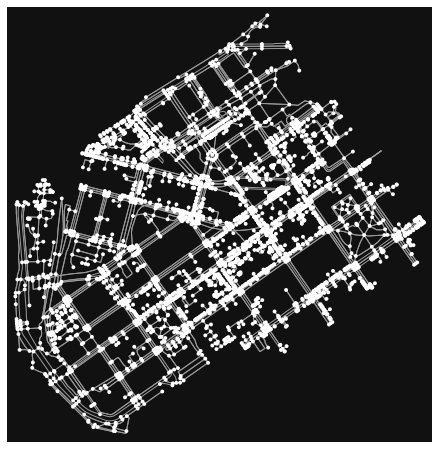

In [6]:
fig, ax = ox.plot_graph(graph)

### graph to geodataframe

In [7]:
nodes, edges = ox.graph_to_gdfs(graph)

In [8]:
type(nodes)

geopandas.geodataframe.GeoDataFrame

In [9]:
type(edges)

geopandas.geodataframe.GeoDataFrame

In [10]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
25216594,60.164794,24.921057,5,NaN,NaN,POINT (24.92106 60.16479)
25238874,60.163665,24.921028,4,NaN,NaN,POINT (24.92103 60.16366)
25238883,60.163452,24.921441,4,crossing,NaN,POINT (24.92144 60.16345)
25238933,60.161114,24.924529,3,NaN,NaN,POINT (24.92453 60.16111)
25238937,60.160860,24.925861,3,NaN,NaN,POINT (24.92586 60.16086)


In [11]:
edges.head()

osmid  oneway lanes            name   highway  \
u        v          key                                                      
25216594 1372425721 0     23717777    True     2   Porkkalankatu   primary   
         1372425714 0     23856784    True     2  Mechelininkatu   primary   
25238874 336192701  0     29977177    True     3  Mechelininkatu   primary   
         1519889266 0    930820886    True     1    Itämerenkatu  tertiary   
25238883 568147264  0     58077048    True     4  Mechelininkatu   primary   

                        maxspeed  length  \
u        v          key                    
25216594 1372425721 0         40  10.404   
         1372425714 0         40  40.885   
25238874 336192701  0         40   5.843   
         1519889266 0         30  10.879   
25238883 568147264  0         40  15.388   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)   
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 336192701  0    LINESTRING (24.92103 60.16366, 24.92104 60.16361)   
         1519889266 0    LINESTRING (24.92103 60.16366, 24.92083 60.16366)   
25238883 568147264  0    LINESTRING (24.92144 60.16345, 24.92140 60.16359)   

                        junction tunnel access bridge service  ref  
u        v          key                                             
25216594 1372425721 0        NaN    NaN    NaN    NaN     NaN  NaN  
         1372425714 0        NaN    NaN    NaN    NaN     NaN  NaN  
25238874 336192701  0        NaN    NaN    NaN    NaN     NaN  NaN  
         1519889266 0        NaN    NaN    NaN    NaN     NaN  NaN  
25238883 568147264  0        NaN    NaN    NaN    NaN     NaN  NaN

In [12]:
print(f'nodes crs: {nodes.crs}\negdges crs: {edges.crs}')

nodes crs: epsg:4326
egdges crs: epsg:4326


### download polygon data

In [13]:
area = ox.geocode_to_gdf(place_name)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [14]:
area.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...",60.172075,60.160469,24.943453,24.920642,284006158,relation,184714,60.168535,24.930494,"Kamppi, Southern major district, Helsinki, Hel...",boundary,administrative,0.760313


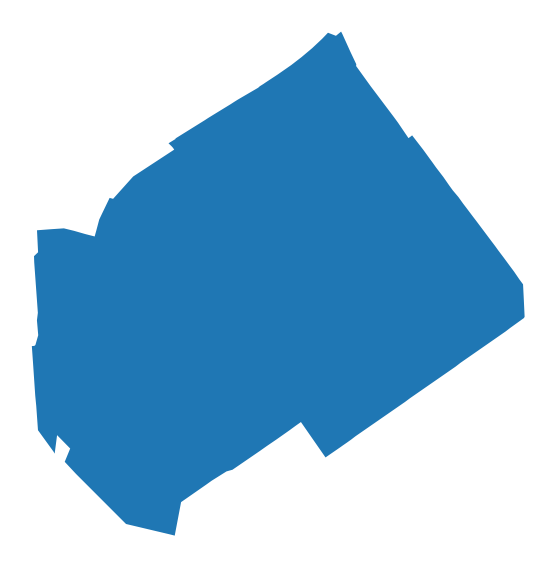

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
area.plot(ax=ax)
ax.axis('off')
plt.tight_layout()

### download buildings data

In [16]:
# list key-value pair for tags
tags = {'building': True}

In [17]:
buildings = ox.geometries_from_place(place_name, tags)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [18]:
len(buildings)

438

In [19]:
buildings.head()

amenity          operator wheelchair  \
element_type osmid                                           
way          8035238      NaN               NaN        NaN   
             8042297      NaN               NaN        NaN   
             14797170     NaN  City of Helsinki        NaN   
             14797171     NaN               NaN        NaN   
             14797172     NaN               NaN        NaN   

                                                                geometry  \
element_type osmid                                                         
way          8035238   POLYGON ((24.93563 60.17045, 24.93557 60.17054...   
             8042297   POLYGON ((24.92938 60.16795, 24.92933 60.16797...   
             14797170  POLYGON ((24.92427 60.16648, 24.92427 60.16650...   
             14797171  POLYGON ((24.92390 60.16729, 24.92391 60.16731...   
             14797172  POLYGON ((24.92647 60.16689, 24.92648 60.16689...   

                       source access addr:housenumber      addr:street  \
element_type osmid                                                       
way          8035238      NaN    NaN            22-24  Mannerheimintie   
             8042297      NaN    NaN                2   Runeberginkatu   
             14797170  survey    NaN               10  Lapinlahdenkatu   
             14797171  survey    NaN              NaN              NaN   
             14797172  survey    NaN              NaN              NaN   

                      addr:unit  ref  ... lippakioski takeaway  \
element_type osmid                    ...                        
way          8035238        NaN  NaN  ...         NaN      NaN   
             8042297        NaN  NaN  ...         NaN      NaN   
             14797170       NaN  NaN  ...         NaN      NaN   
             14797171       NaN  NaN  ...         NaN      NaN   
             14797172       NaN  NaN  ...         NaN      NaN   

                      outdoor_seating addr:floor covered area ways type  \
element_type osmid                                                        
way          8035238              NaN        NaN     NaN  NaN  NaN  NaN   
             8042297              NaN        NaN     NaN  NaN  NaN  NaN   
             14797170             NaN        NaN     NaN  NaN  NaN  NaN   
             14797171             NaN        NaN     NaN  NaN  NaN  NaN   
             14797172             NaN        NaN     NaN  NaN  NaN  NaN   

                      electrified nohousenumber  
element_type osmid                               
way          8035238          NaN           NaN  
             8042297          NaN           NaN  
             14797170         NaN           NaN  
             14797171         NaN           NaN  
             14797172         NaN           NaN  

[5 rows x 104 columns]

In [20]:
buildings.columns

Index(['amenity', 'operator', 'wheelchair', 'geometry', 'source', 'access',
       'addr:housenumber', 'addr:street', 'addr:unit', 'ref',
       ...
       'lippakioski', 'takeaway', 'outdoor_seating', 'addr:floor', 'covered',
       'area', 'ways', 'type', 'electrified', 'nohousenumber'],
      dtype='object', length=104)

- too many columns when you just specify buildings
- you can narrow it down by specifying your points of interest from the list

### points of interest

In [21]:
tags = {'amenity': 'restaurant'}
restaurants = ox.geometries_from_place(place_name, tags)
len(restaurants)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


170

In [22]:
restaurants.columns.values

array(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'amenity', 'cuisine', 'diet:halal', 'diet:kosher',
       'name', 'phone', 'website', 'wheelchair', 'geometry',
       'toilets:wheelchair', 'delivery:covid19', 'opening_hours:covid19',
       'takeaway:covid19', 'opening_hours', 'diet:vegetarian', 'name:fi',
       'name:zh', 'short_name', 'description', 'diet:vegan',
       'contact:phone', 'contact:website', 'source', 'outdoor_seating',
       'check_date:opening_hours', 'addr:housename', 'email', 'level',
       'address', 'access:covid19', 'drive_through:covid19', 'takeaway',
       'delivery', 'url', 'brunch', 'lunch:menu', 'reservation', 'room',
       'opening_hours:brunch', 'toilets', 'capacity', 'smoking',
       'access:dog', 'operator', 'shop', 'alt_name', 'contact:email',
       'established', 'name:sv', 'drive_through', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'floor', 'name:en',
       'description:en', 'old_name', 

In [23]:
cols = ['name', 'opening_hours', 'addr:city', 'addr:country',
       'addr:housenumber', 'addr:postcode', 'addr:street']

restaurants[cols].head(10)

name  \
element_type osmid                                 
node         60062502                     Kabuki   
             62965963               Empire Plaza   
             76617692               Johan Ludvig   
             76624339                    Shinobi   
             76624351                     Pueblo   
             76627823                     Atabar   
             89074039                Papa Albert   
             151006260           Ravintola China   
             151006483  Tony's deli + Street Bar   
             151006932                Haru Sushi   

                                                            opening_hours  \
element_type osmid                                                          
node         60062502                                                 NaN   
             62965963                                                 NaN   
             76617692                                                 NaN   
             76624339                                                 NaN   
             76624351                                                 NaN   
             76627823                                                 NaN   
             89074039   Mo-Th 10:00-14:00, 17:30-22:00; Fr 11:00-23:00...   
             151006260       Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off   
             151006483                                                NaN   
             151006932  Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00   

                       addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                             
node         60062502   Helsinki           FI               12         00180   
             62965963        NaN          NaN              NaN           NaN   
             76617692   Helsinki           FI              NaN           NaN   
             76624339   Helsinki           FI               38         00120   
             76624351   Helsinki           FI              NaN           NaN   
             76627823   Helsinki           FI              NaN           NaN   
             89074039   Helsinki           FI               30         00120   
             151006260  Helsinki           FI               25         00100   
             151006483  Helsinki           FI                7         00120   
             151006932  Helsinki           FI               30         00120   

                            addr:street  
element_type osmid                       
node         60062502   Lapinlahdenkatu  
             62965963               NaN  
             76617692               NaN  
             76624339      Albertinkatu  
             76624351       Eerikinkatu  
             76627823       Eerikinkatu  
             89074039      Albertinkatu  
             151006260        Annankatu  
             151006483        Bulevardi  
             151006932    Fredrikinkatu

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:7

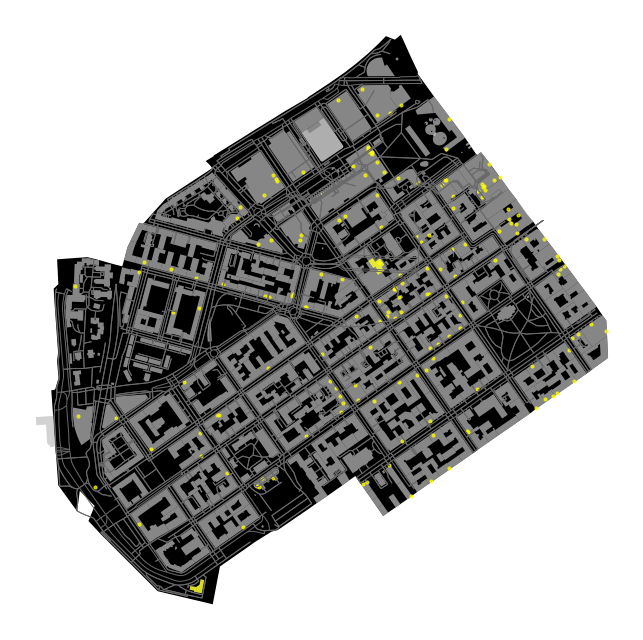

In [24]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.axis('off')

# plot the footprint
area.plot(ax=ax, facecolor='black')

# plot the street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)

plt.tight_layout()

### extra: Park Polygons

In [25]:
tags = {'leisure': 'park', 'landuse': 'grass'}

In [26]:
parks = ox.geometries_from_place(place_name, tags)

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [27]:
print(len(parks))

56


C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

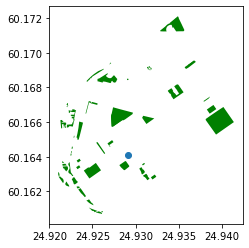

In [29]:
parks.plot(facecolor='green')

In [30]:
parks.head()

geometry  \
element_type osmid                                                           
node         9577568989                          POINT (24.92915 60.16411)   
way          8042256     POLYGON ((24.93566 60.17132, 24.93566 60.17130...   
             8042613     POLYGON ((24.93701 60.16947, 24.93627 60.16919...   
             15218362    POLYGON ((24.92330 60.16499, 24.92323 60.16500...   
             15218739    POLYGON ((24.92741 60.16575, 24.92741 60.16574...   

                        access  source addr:city leisure                name  \
element_type osmid                                                             
node         9577568989    NaN     NaN       NaN    park      Kirveen puisto   
way          8042256       NaN     NaN       NaN    park                 NaN   
             8042613       NaN     NaN       NaN    park      Simonpuistikko   
             15218362      NaN  survey       NaN    park  Työmiehenpuistikko   
             15218739      NaN     NaN       NaN    park         Lastenlehto   

                                                                     nodes  \
element_type osmid                                                           
node         9577568989                                                NaN   
way          8042256     [292719496, 1001543836, 1037987967, 1001544060...   
             8042613     [552965718, 293390264, 295056669, 256264975, 1...   
             15218362    [144181223, 150532964, 150532958, 150532966, 1...   
             15218739    [1876856069, 1876856056, 1876856052, 187685606...   

                                    name:fi        name:sv  \
element_type osmid                                           
node         9577568989                 NaN            NaN   
way          8042256                    NaN            NaN   
             8042613         Simonpuistikko  Simonsskvären   
             15218362    Työmiehenpuistikko  Arbetarparken   
             15218739           Lastenlehto    Barnslunden   

                        hoitoluokitus_viheralue   wikidata       wikipedia  \
element_type osmid                                                           
node         9577568989                     NaN        NaN             NaN   
way          8042256                        NaN        NaN             NaN   
             8042613                        NaN        NaN             NaN   
             15218362                        A2        NaN             NaN   
             15218739                        A2  Q18660505  fi:Lastenlehto   

                        landuse alt_name loc_name  
element_type osmid                                 
node         9577568989     NaN      NaN      NaN  
way          8042256        NaN      NaN      NaN  
             8042613        NaN      NaN      NaN  
             15218362       NaN      NaN      NaN  
             15218739       NaN      NaN      NaN

C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\ProgramData\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:7

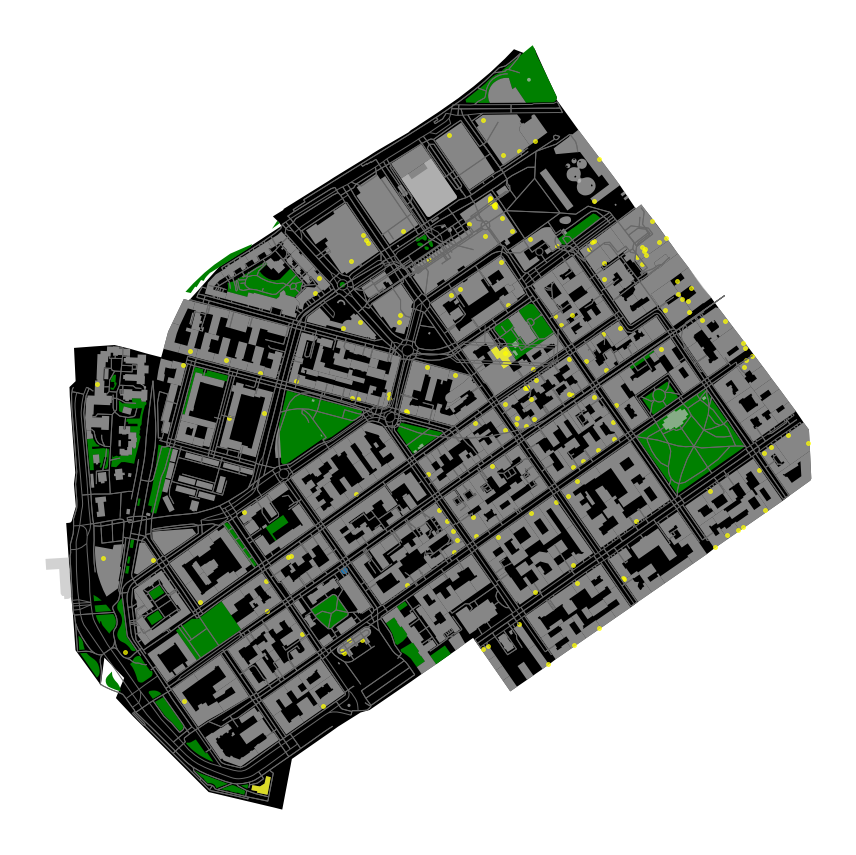

In [36]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.axis('off')

# plot the footprint
area.plot(ax=ax, facecolor='black', legend=True)

# plot the street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray', legend=True)

# plot parks
parks.plot(ax=ax, facecolor='green', legend=True)

# plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7, legend=True)

# plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=15, legend=True)

plt.tight_layout()